In [17]:
import numpy as np
import matplotlib.pyplot as plt

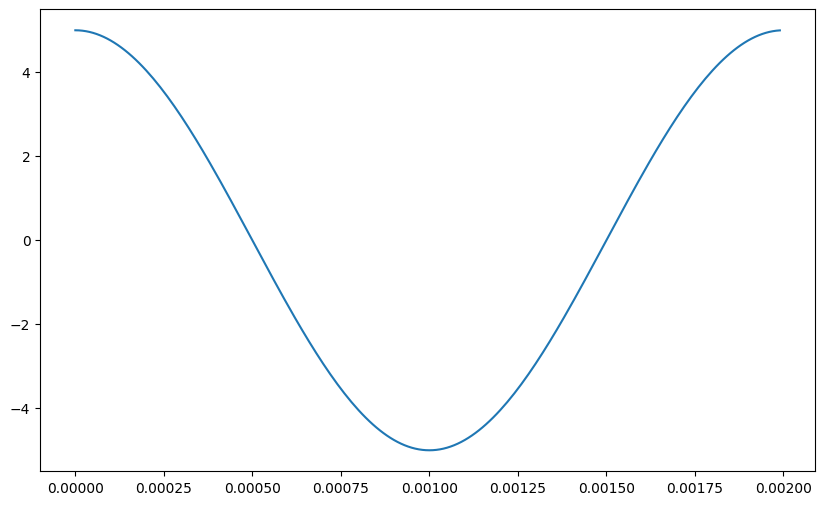

In [18]:
t = np.arange(0, 0.002, 0.00001)

x = 5 * np.sin(2 * np.pi * 500 * t + np.radians(90))

plt.figure(figsize=(10, 6))

plt.plot(t, x)

plt.show()

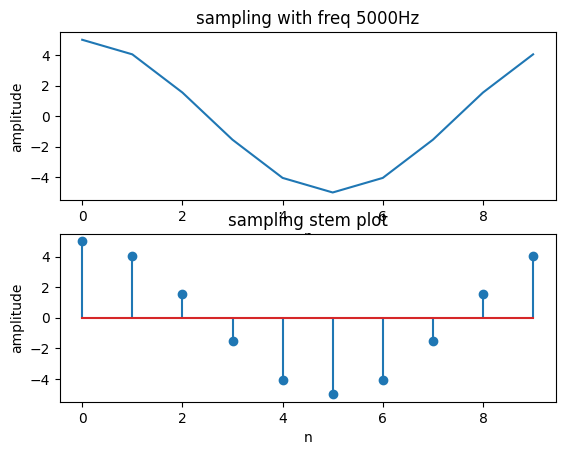

In [19]:
fs = 5000
n = np.arange(0, 0.002, 1 / fs)


x_n = 5 * np.sin(2 * np.pi * 500 * n + np.pi / 2)
plt.subplot(2, 1, 1)
plt.plot(x_n)
plt.title("sampling with freq 5000Hz")
plt.xlabel("n")
plt.ylabel("amplitude")

plt.subplot(2, 1, 2)
plt.stem(x_n)
plt.title("sampling stem plot")
plt.xlabel("n")
plt.ylabel("amplitude")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Binary sequence: 
['11', '11', '10', '01', '00', '00', '00', '01', '10', '11']
Mean Squared Error:  37.0 %


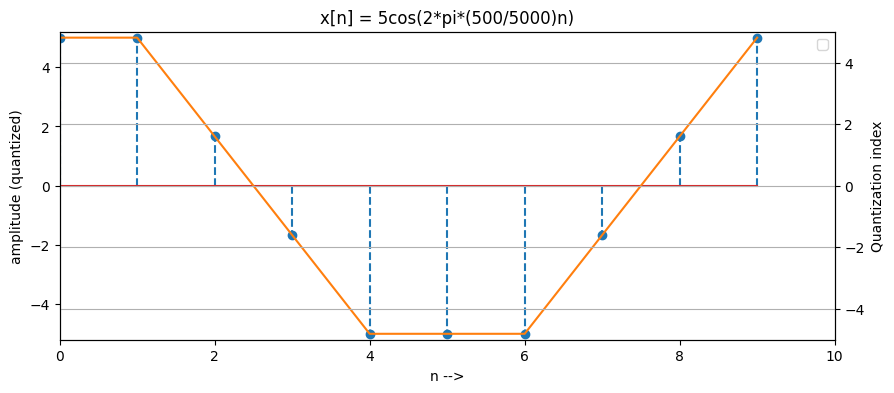

In [51]:
# Quantization

no_of_bits = 2
mx = np.max(x_n)
mn = np.min(x_n)

step_size = (mx - mn) / (2 ** no_of_bits -1)

x_q = (np.round((x_n - mn) / step_size)) * step_size + mn

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.stem(x_q, linefmt='--')
ax1.plot(x_q)
ax1.set_xlabel('n -->')
ax1.set_ylabel('amplitude (quantized)')
ax1.set_title("x[n] = 5cos(2*pi*(500/5000)n)")
ax1.axis([0, 10, -5.2, 5.2])
ax1.legend()

ax2.set_ylim([-5, 5])
ax2.set_ylabel("Quantization index")
ax2.grid()

print("Binary sequence: ")
b = []
levels = np.round((x_q - mn) / step_size).astype(int)
# print(len(levels))

for level in levels:
    binary_code = bin(level)[2:]
    binary_code = binary_code.zfill(no_of_bits)
    b.append(binary_code)

print(b)

quantization_error = x_n - x_q
mse = np.mean(quantization_error ** 2)
print("Mean Squared Error: ", round(mse, 2)*100, "%")

# plt.tight_layout()
plt.show()